In [1]:
import os
import pandas as pd
import matplotlib as mlt
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")
import requests
import json
from config import api_key
from scipy import stats

In [2]:
 #designate the csv file data path
data_load = Path ('../Resources/wine_data.csv')

# uniform language
wine_df = pd.read_csv(data_load,encoding="ISO-8859-1")

# removing duplicates
wine_df = wine_df.drop(["Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], axis=1)
wine_df = wine_df.drop_duplicates()

# rennaming and capitalization of data
wine_df.rename(columns={'country':'Country'}, inplace=True)
wine_df.rename(columns={'description':'Description'}, inplace=True)
wine_df.rename(columns={'points':'Points'}, inplace=True)
wine_df.rename(columns={'price ($)':'Price ($)'}, inplace=True)
wine_df.rename(columns={'region':'Region'}, inplace=True)
wine_df.rename(columns={'title':'Title'}, inplace=True)
wine_df.rename(columns={'variety':'Variety'}, inplace=True)

#change types from objects to strings, anything that is a number to a float64/int
wine_df['Country']= wine_df['Country'].astype('string')
wine_df['Description']= wine_df['Description'].astype('string')
wine_df['Region']= wine_df['Region'].astype('string')
wine_df['Title']= wine_df['Title'].astype('string')
wine_df['Variety']= wine_df['Variety'].astype('string')
wine_df['Price ($)']=pd.to_numeric(wine_df['Price ($)'],errors='coerce')
wine_df['Points']=pd.to_numeric(wine_df['Points'],errors='coerce')

#drop unnecessary values
wine_df = wine_df.dropna(axis=0)

#print first five rows of data frame
wine_df.head()



C:\Users\caroj\AppData\Local\Temp\ipykernel_5580\2197072012.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  wine_df = pd.read_csv(data_load,encoding="ISO-8859-1")


,Country,Description,Points,Price ($),Region,Title,Variety
2,US,"Tart and snappy, the flavors of lime flesh and...",87.0,14.0,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87.0,13.0,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87.0,65.0,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir
5,Spain,Blackberry and raspberry aromas show a typical...,87.0,15.0,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot
6,Italy,"Here's a bright, informal red that opens with ...",87.0,16.0,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato


In [3]:
# df types
wine_df.dtypes

Country        string[python]
Description    string[python]
Points                float64
Price ($)             float64
Region         string[python]
Title          string[python]
Variety        string[python]
dtype: object

In [4]:
# df count
wine_df.count()

Country        93576
Description    93576
Points         93576
Price ($)      93576
Region         93576
Title          93576
Variety        93576
dtype: int64

In [5]:
#find the different columns that are in data frame
wine_df.columns 

Index(['Country', 'Description', 'Points', 'Price ($)', 'Region', 'Title',
       'Variety'],
      dtype='object')

In [6]:
st.shapiro(wine_df ['Points'])

c:\Users\caroj\anaconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9893147945404053, pvalue=0.0)

In [7]:
st.kstest(wine_df ['Points'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=80.0, statistic_sign=-1)

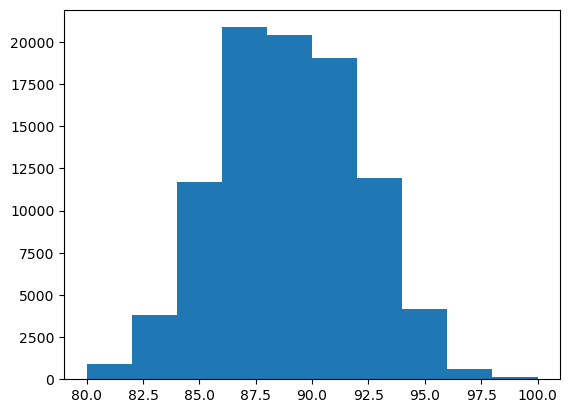

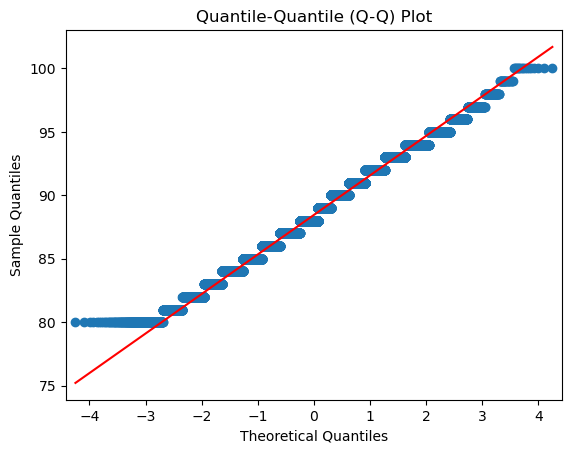

In [8]:
plt.hist(wine_df ['Points'])
plt.show()
sm.qqplot(wine_df ['Points'], line='s')
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.show()

In [9]:
st.shapiro(wine_df ['Price ($)'])

ShapiroResult(statistic=0.4294751286506653, pvalue=0.0)

In [10]:
st.kstest(wine_df ['Price ($)'], 'norm')

KstestResult(statistic=0.9999683287581669, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)

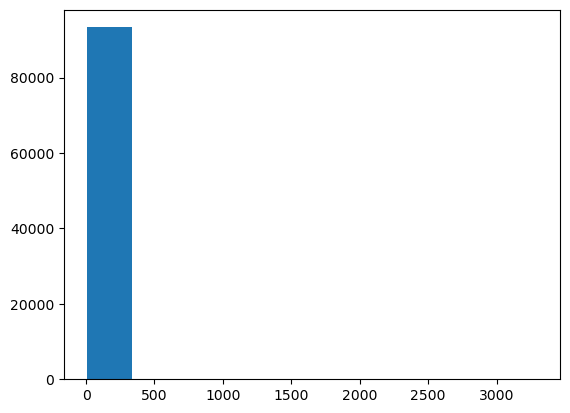

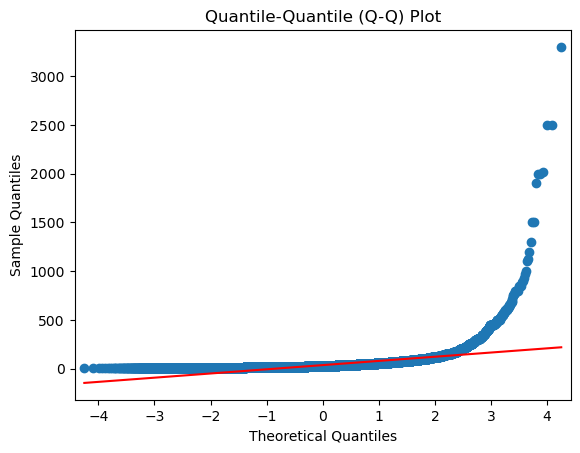

In [11]:
plt.hist(wine_df['Price ($)'])
plt.show()
sm.qqplot(wine_df['Price ($)'], line='s')
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.show()

In [12]:
wine_df_spearman = wine_df[['Price ($)', 'Points']]
wine_df_spearman.corr(method='spearman')

,Price ($),Points
Price ($),1.000000,0.609115
Points,0.609115,1.000000


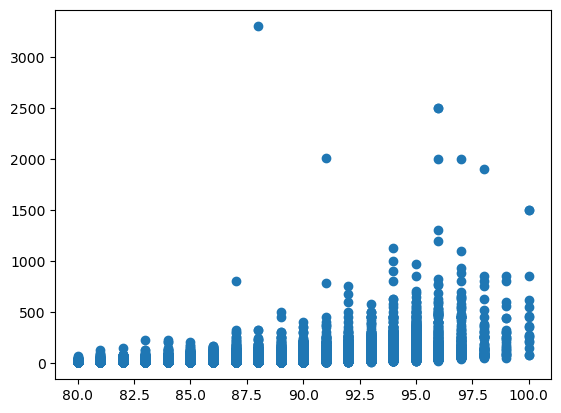

SignificanceResult(statistic=0.6091152033991962, pvalue=0.0)

In [13]:
x_values = wine_df['Points']
y_values = wine_df['Price ($)']
plt.scatter(x_values,y_values)
plt.show()
st.spearmanr(wine_df['Price ($)'], wine_df ['Points'])

In [14]:
#isolate the top 10 wines based on variety data
df= wine_df['Variety'].value_counts()
threshold = 2500
drop_df = df[df > threshold].index

clean_wine_df = wine_df[wine_df['Variety'].isin(drop_df)==True].reset_index(drop=True)

clean_wine_df


,Country,Description,Points,Price ($),Region,Title,Variety
0,US,"Much like the regular bottling from 2012, this...",87.0,65.0,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir
1,US,"Soft, supple plum envelopes an oaky structure ...",87.0,19.0,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon
2,US,"Slightly reduced, this wine offers a chalky, t...",87.0,34.0,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon
3,US,Building on 150 years and six generations of w...,87.0,12.0,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay
4,US,Ripe aromas of dark berries mingle with ample ...,87.0,23.0,Virginia,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend
...,...,...,...,...,...,...,...
50916,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",90.0,20.0,Terre Siciliane,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend
50917,US,There's no bones about the use of oak in this ...,90.0,35.0,Napa Valley,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay
50918,US,This opens with herbaceous dollops of thyme an...,90.0,35.0,Napa Valley,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel
50919,US,This Zinfandel from the eastern section of Nap...,90.0,22.0,Chiles Valley,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel


In [15]:
upper_points = clean_wine_df.loc[(clean_wine_df['Points']>= 90) & (clean_wine_df['Price ($)']<= 300)]

upper_points[['Points', 'Price ($)']]

,Points,Price ($)
44,92.0,36.0
45,92.0,39.0
46,92.0,45.0
47,91.0,78.0
48,91.0,50.0
...,...,...
50916,90.0,20.0
50917,90.0,35.0
50918,90.0,35.0
50919,90.0,22.0


In [16]:
st.shapiro(upper_points['Points'])

c:\Users\caroj\anaconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8893659710884094, pvalue=0.0)

In [17]:
st.kstest(upper_points['Points'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=90.0, statistic_sign=-1)

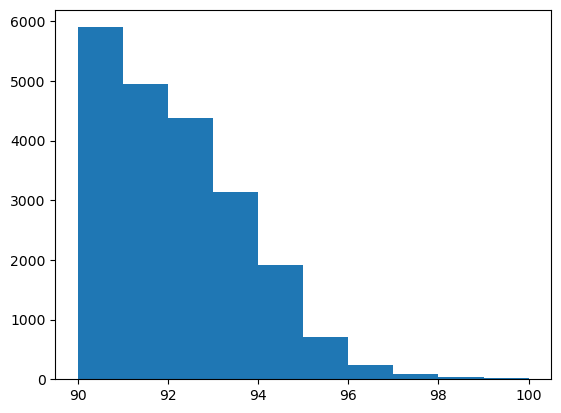

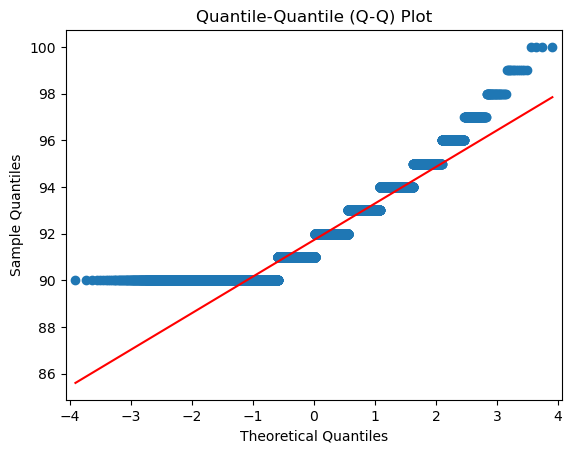

In [18]:
plt.hist(upper_points['Points'])
plt.show()
sm.qqplot(upper_points['Points'], line='s')
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.show()

In [19]:
st.shapiro(upper_points['Price ($)'])

ShapiroResult(statistic=0.7734923958778381, pvalue=0.0)

In [20]:
st.kstest(upper_points['Price ($)'], 'norm')

KstestResult(statistic=0.9999999999999993, pvalue=0.0, statistic_location=8.0, statistic_sign=-1)

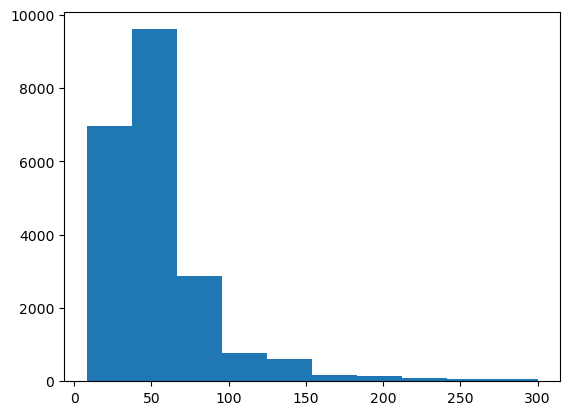

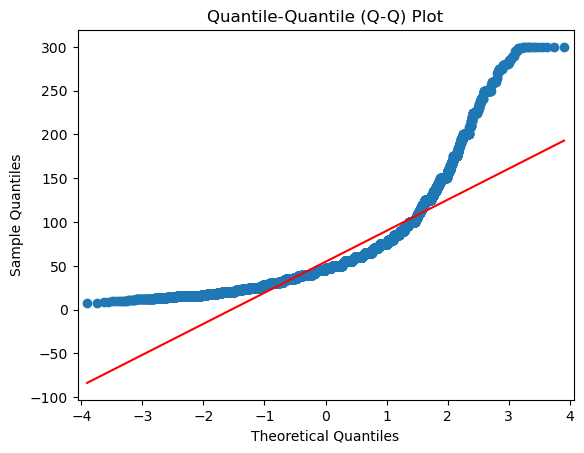

In [21]:
plt.hist(upper_points['Price ($)'])
plt.show()
sm.qqplot(upper_points['Price ($)'], line='s')
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.show()

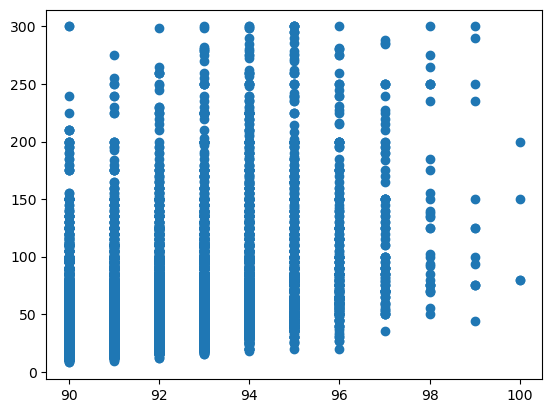

SignificanceResult(statistic=0.4487728524484996, pvalue=0.0)

In [23]:
x_values = upper_points['Points']
y_values = upper_points['Price ($)']
plt.scatter(x_values,y_values)
plt.show()
st.spearmanr(upper_points['Price ($)'], upper_points['Points'])

In [ ]:
# create a new data frame

color_cw_df = clean_wine_df.copy()

#for loop to add a column with the wine color to the new data frame 

for i, row in color_cw_df.iterrows():
    if (row['Variety'] == 'Pinot Noir') | (row['Variety'] =='Cabernet Sauvignon') | (row['Variety'] =='Red Blend')|(row['Variety'] == 'Bordeaux-style Red Blend') | (row['Variety'] == 'Syrah') | (row['Variety'] == 'Zinfandel'):
        color_cw_df.at[i, 'Wine Color'] = 'Red'
    
    if (row['Variety'] == 'Chardonnay') | (row['Variety'] =='Sauvignon Blanc'):
        color_cw_df.at[i, 'Wine Color'] = 'White'
    
    if row['Variety'] =='Rosé':
        color_cw_df.at[i, 'Wine Color'] = 'Other'



In [ ]:
color_cw_df

,Country,Description,Points,Price ($),Region,Title,Variety,Wine Color
0,US,"Much like the regular bottling from 2012, this...",87.0,65.0,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Red
1,US,"Soft, supple plum envelopes an oaky structure ...",87.0,19.0,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Red
2,US,"Slightly reduced, this wine offers a chalky, t...",87.0,34.0,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Red
3,US,Building on 150 years and six generations of w...,87.0,12.0,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,White
4,US,Ripe aromas of dark berries mingle with ample ...,87.0,23.0,Virginia,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Red
...,...,...,...,...,...,...,...,...
50916,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",90.0,20.0,Terre Siciliane,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Red
50917,US,There's no bones about the use of oak in this ...,90.0,35.0,Napa Valley,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,White
50918,US,This opens with herbaceous dollops of thyme an...,90.0,35.0,Napa Valley,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Red
50919,US,This Zinfandel from the eastern section of Nap...,90.0,22.0,Chiles Valley,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Red


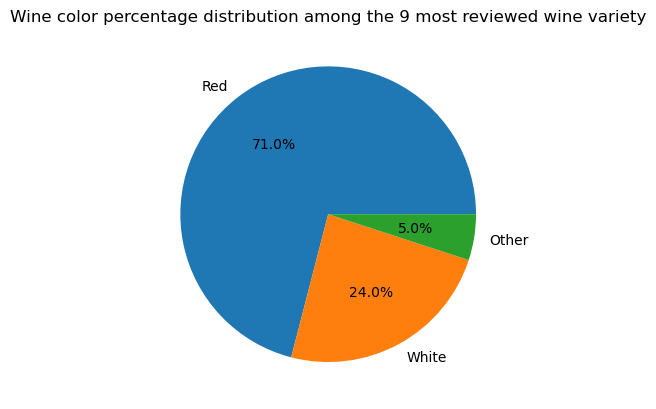

In [ ]:
plt.pie(color_cw_df['Wine Color'].value_counts(), labels=(color_cw_df['Wine Color'].value_counts().index.values),autopct='%1.1f%%')
plt.title('Wine color percentage distribution among the 9 most reviewed wine variety')
plt.show()

In [ ]:
color_cw_df.groupby('Wine Color')['Wine Color'].count()

Wine Color
Other     2557
Red      36141
White    12223
Name: Wine Color, dtype: int64

variance of Red wine is 10.288635418551847
Shapiro-Wilk: W:0.986842691898346 p:0.0


c:\Users\caroj\anaconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


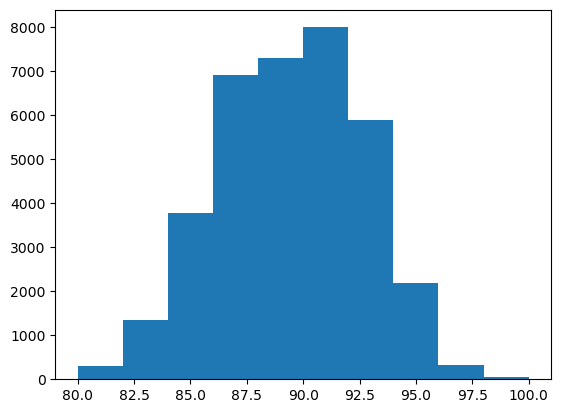

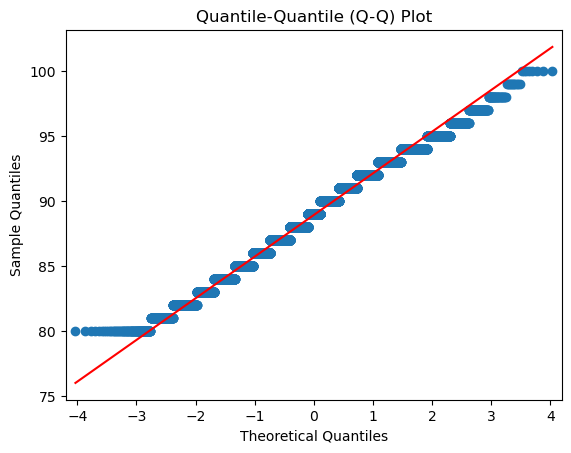

variance of White wine is 10.137882897879102
Shapiro-Wilk: W:0.9858100414276123 p:4.533615388182705e-33


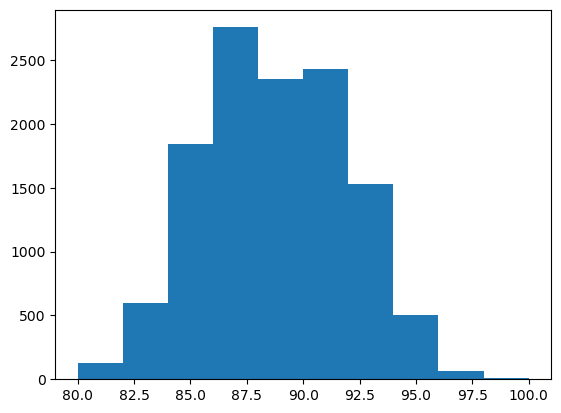

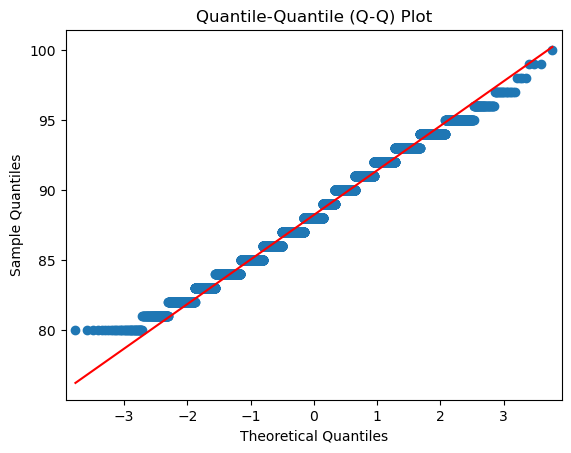

In [ ]:
colors = ['Red','White',]

# Create empty list to fill with tumor vol data (for plotting)

scores = []


for i in colors:
    total = color_cw_df.loc[color_cw_df['Wine Color']==i,'Points']
    scores_var = total.var()
    print(f'variance of {i} wine is {scores_var}')
    W, p =stats.shapiro(total)
    print('Shapiro-Wilk: W:{0} p:{1}'.format(W, p)) 
    plt.hist(total)
    plt.show()
    sm.qqplot(total, line='s')
    plt.title('Quantile-Quantile (Q-Q) Plot')
    plt.show()

       


In [ ]:
group1 = color_cw_df[color_cw_df['Wine Color']=='Red']
group2 = color_cw_df[color_cw_df['Wine Color']=='White']
stats.ttest_ind(group1['Points'], group2['Points'])


TtestResult(statistic=20.741037276519087, pvalue=3.840109180432591e-95, df=48362.0)

In [26]:
#check new df types 
clean_wine_df.dtypes

Country        string[python]
Description    string[python]
Points                float64
Price ($)             float64
Region         string[python]
Title          string[python]
Variety        string[python]
dtype: object

In [27]:
clean_wine_df['Variety'].value_counts()

Variety
Pinot Noir                  10841
Chardonnay                   9293
Cabernet Sauvignon           7738
Red Blend                    6940
Bordeaux-style Red Blend     4754
Syrah                        3345
Sauvignon Blanc              2930
Rosé                         2557
Zinfandel                    2523
Name: count, dtype: Int64

In [24]:
#isolate the wines that have points of 90 or avbove
high_points= clean_wine_df.loc[(clean_wine_df['Points']>= 90)]


In [25]:
#find the countries that produced the 90 or above wines
high_points['Country'].value_counts()

Country
US           15823
France        3522
Italy         1337
Australia      303
Spain          290
Argentina      212
Canada          47
Name: count, dtype: Int64

In [28]:
#create map for countries using their longitude and latitude
coordinates = {'longitude': [-95.7129,12.496366,2.213749, -4.00000000, 135.0000,-63.616672,-95.00],
                'latitude': [37.0902,41.902782, 46.227638, 40.00000000,-25.0000,-38.416097,60.00], 
               'Country': ['US', 'Italy', 'France', 'Spain', 'Australia', 'Argentina', 'Canada']}

coordinates_df= pd.DataFrame(coordinates)

coordinates_df


,longitude,latitude,Country
0,-95.712900,37.090200,US
1,12.496366,41.902782,Italy
2,2.213749,46.227638,France
3,-4.000000,40.000000,Spain
4,135.000000,-25.000000,Australia
5,-63.616672,-38.416097,Argentina
6,-95.000000,60.000000,Canada


In [30]:
#using the coordinates_df created above, map the points
country_map= coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
     tiles = "EsriNatGeo",
    color = 'Country'
)

country_map

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [31]:
highest_points_df = high_points.loc[(high_points['Points']==100)]

highest_points_df

,Country,Description,Points,Price ($),Region,Title,Variety
18682,US,Tasted in a flight of great and famous Napa wi...,100.0,200.0,Napa Valley,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon
23700,France,"This is a magnificently solid wine, initially ...",100.0,150.0,Saint-Julien,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend
35721,France,This new release from a great vintage for Char...,100.0,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay
44204,France,"Almost black in color, this stunning wine is g...",100.0,1500.0,Pauillac,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
44205,France,This is the finest Cheval Blanc for many years...,100.0,1500.0,Saint-Émilion,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
44206,France,"A hugely powerful wine, full of dark, brooding...",100.0,359.0,Saint-Julien,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend
44948,US,In 2005 Charles Smith introduced three high-en...,100.0,80.0,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah
46462,US,This wine dazzles with perfection. Sourced fro...,100.0,450.0,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
48502,US,Initially a rather subdued Frog; as if it has ...,100.0,80.0,Walla Walla Valley (WA),Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah


In [32]:
#create df for highest rated wines
high_region_coordinates = {'Region': ['Napa Valley', 'Saint-Julien', 'Champagne', 'Pauillac',
                                       'Saint-Emilion', 'Columbia Valley (WA)',
                                       'Sonoma County', 'Walla Walla Valley (WA)'],
                                       'latitude': [38.297539, 45.15719931429095, 48.957500,45.19644,44.88333000, 49.0000,38.52529000,46.064583],
                                    'longitude': [ -122.286865,  -0.7391816604296135, 4.365000,-0.74873,-0.15000000, -122.0833,-122.92254000, -118.343018]}

high_region_coordinates_df= pd.DataFrame(high_region_coordinates)

high_region_coordinates_df

,Region,latitude,longitude
0,Napa Valley,38.297539,-122.286865
1,Saint-Julien,45.157199,-0.739182
2,Champagne,48.957500,4.365000
3,Pauillac,45.196440,-0.748730
4,Saint-Emilion,44.883330,-0.150000
5,Columbia Valley (WA),49.000000,-122.083300
6,Sonoma County,38.525290,-122.922540
7,Walla Walla Valley (WA),46.064583,-118.343018


In [33]:
#using the high_reion_coordinates_df plot the points on a map
high_region_map= high_region_coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    color = 'Region'
)


high_region_map

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [34]:
#create a new df that will hold weather data for the regions

weather_data = high_region_coordinates_df

weather_data_df = pd.DataFrame(weather_data)

weather_data_df

,Region,latitude,longitude
0,Napa Valley,38.297539,-122.286865
1,Saint-Julien,45.157199,-0.739182
2,Champagne,48.957500,4.365000
3,Pauillac,45.196440,-0.748730
4,Saint-Emilion,44.883330,-0.150000
5,Columbia Valley (WA),49.000000,-122.083300
6,Sonoma County,38.525290,-122.922540
7,Walla Walla Valley (WA),46.064583,-118.343018


In [35]:
for index, row in weather_data_df.iterrows():
    #define lat and lon variable by assigning it to its respective row from weather_data_df
    lat = row["latitude"]
    lon = row["longitude"]
    #create the base url that will be used for the API
    url = 'https://history.openweathermap.org/data/2.5/aggregated/year?'
    #create the query_url that has the parameters needed to access and find the data
    query_url = f"{url}lat={lat}&lon={lon}&appid={api_key}"
    #create the response by getting the query_url in json format
    response = requests.get(query_url).json()
    #as it loops through the lat/lon, have it append the temp/precipitation to its respective columns
    weather_data_df.loc[index, "Average Temperature (kelvin)"] = response["result"][1]["temp"]['mean']
    weather_data_df.loc[index, "Max Precipitation (mm)"] = response["result"][1]["precipitation"]['max']
    weather_data_df.loc[index, "Avg. Humidity (%)"] = response["result"][1]["humidity"]['mean']
#at the end of the for loop print the df to make sure information was added correctly 
weather_data_df

NameError: name 'api_key' is not defined

In [36]:
#gather data types 
weather_data_df.dtypes

Region        object
latitude     float64
longitude    float64
dtype: object

In [37]:
#create a copy of weather data to add fahreinheit column
final_weather_df = weather_data_df.copy()

final_weather_df

,Region,latitude,longitude
0,Napa Valley,38.297539,-122.286865
1,Saint-Julien,45.157199,-0.739182
2,Champagne,48.957500,4.365000
3,Pauillac,45.196440,-0.748730
4,Saint-Emilion,44.883330,-0.150000
5,Columbia Valley (WA),49.000000,-122.083300
6,Sonoma County,38.525290,-122.922540
7,Walla Walla Valley (WA),46.064583,-118.343018


In [38]:
#add fahreinheit column
final_weather_df['Avg. Temp (Fahreinheit)'] = (46, 47, 43, 47, 47, 35, 45, 24)

final_weather_df

,Region,latitude,longitude,Avg. Temp (Fahreinheit)
0,Napa Valley,38.297539,-122.286865,46
1,Saint-Julien,45.157199,-0.739182,47
2,Champagne,48.957500,4.365000,43
3,Pauillac,45.196440,-0.748730,47
4,Saint-Emilion,44.883330,-0.150000,47
5,Columbia Valley (WA),49.000000,-122.083300,35
6,Sonoma County,38.525290,-122.922540,45
7,Walla Walla Valley (WA),46.064583,-118.343018,24


In [39]:
#create bar chart to visualize max rain
rain = final_weather_df.plot.bar(x= 'Region', y= 'Max Precipitation (mm)', rot=90,
                                  color= 'purple', title = 'Rain by Region')

KeyError: 'Max Precipitation (mm)'

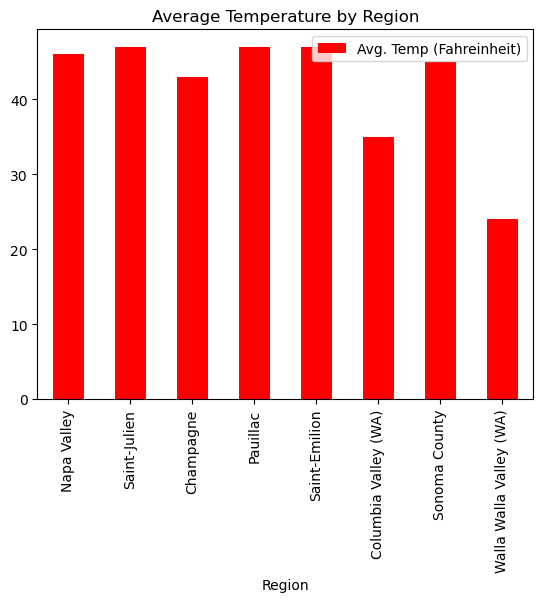

In [40]:
#create bar chart to visualize average temperature
avg_temp = final_weather_df.plot.bar(x= 'Region', y= 'Avg. Temp (Fahreinheit)',
                                      rot=90, color = 'red', title = 'Average Temperature by Region')

In [41]:
#create bar chart to visualize average humidity
avg_humidity = final_weather_df.plot.bar(x= 'Region', y= 'Avg. Humidity (%)', 
                                         rot=90, color = 'green', title = 'Average Humidity by Region')

KeyError: 'Avg. Humidity (%)'